## Analyze Dataset House Price

In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [213]:
df = pd.read_csv('housepricesdata.csv')

In [214]:
df

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price
0,Taman Sari Semanggi Apartment 1BR Tower A,1,1,Semanggi,Jakarta Selatan,106.819159,-6.226598,1,43.0,Tower A,23,IDR,96000000
1,Puri Park View Apartment 2BR Semi Furnished,2,1,Kebon Jeruk,Jakarta Barat,106.756061,-6.192081,0,35.0,Tower CB,19,IDR,30000000
2,Metro Park Residence 2BR Fully Furnished,2,1,Kedoya,Jakarta Barat,106.757651,-6.186415,1,53.0,Tower Milan,22,IDR,70000000
3,Pondok Indah Golf Apartment 2BR View Golf Area,2,2,Pondok Indah,Jakarta Selatan,106.784600,-6.272637,1,85.0,Tower -,24,IDR,576000000
4,Season City Apartment 2BR Tower C,2,1,Grogol,Jakarta Barat,106.796056,-6.153652,0,48.0,Tower C,15,IDR,32000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5298,Grand Centerpoint Apartment 2BR View pool,2,1,Pekayon,Bekasi,106.993400,-6.243400,1,36.0,Tower c,14,IDR,36000000
5299,Roseville SOHO & Suites Studio Fully Furnished,0,1,BSD City,Tangerang,106.664000,-6.294400,1,32.0,Tower East,16,IDR,60000000
5300,Setiabudi Residence 2BR Fully Furnished,2,1,Setiabudi,Jakarta Selatan,106.829330,-6.216540,1,83.0,Tower B,21,IDR,250000000
5301,Apartemen Semanggi 2BR Tower 1,2,1,Slipi,Jakarta Pusat,106.801738,-6.202296,1,68.0,Tower 1,24,IDR,108000000


Penjelasan:
1. Unit_Name: Nama Unit Apartmen
2. No_Rooms: Jumlah bedrooms
3. Bathroom: Jumlah kamar mandi
4. Locality: Daerah
5. Region: Kota/Kabupaten
6. Longitude dan Latitude: letak geografis
7. Furnished: 1 jika fully furnished, 0 jika non-furnished
8. Area: Luas
9. Tower: Lokasi Tower
10. Total_Facilities: Jumlah Total Fasilitas
11. Currency: Mata Uang (USD/IDR)
12. Annual_Price: Harga sewa tahunan (sesuai mata uang)

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5303 entries, 0 to 5302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unit_Name         5302 non-null   object 
 1   No_Rooms          5303 non-null   int64  
 2   Bathroom          5303 non-null   int64  
 3   Locality          5303 non-null   object 
 4   Region            5303 non-null   object 
 5   Longitude         5303 non-null   float64
 6   Latitude          5303 non-null   float64
 7   Furnished         5303 non-null   int64  
 8   Area              5303 non-null   float64
 9   Tower             5303 non-null   object 
 10  Total_Facilities  5303 non-null   int64  
 11  Currency          5303 non-null   object 
 12  Annual_Price      5303 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 538.7+ KB


### 1. Membuat kolom baru bernama `CleanedPrice`, berdasarkan informasi dari kolom `Annual_Price` dan `Currency`, dengan Asumsi 1 USD = 15000 IDR

In [216]:
# Create a new function
def new_class(Currency, Annual_Price):
    if Currency == 'USD' :
        return Annual_Price*15000
    elif Currency == 'IDR' :
        return Annual_Price

# Create new column "CleanedPrice"
df['CleanedPrice'] = np.vectorize(new_class)(df['Currency'],df['Annual_Price'])
df

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,CleanedPrice
0,Taman Sari Semanggi Apartment 1BR Tower A,1,1,Semanggi,Jakarta Selatan,106.819159,-6.226598,1,43.0,Tower A,23,IDR,96000000,96000000
1,Puri Park View Apartment 2BR Semi Furnished,2,1,Kebon Jeruk,Jakarta Barat,106.756061,-6.192081,0,35.0,Tower CB,19,IDR,30000000,30000000
2,Metro Park Residence 2BR Fully Furnished,2,1,Kedoya,Jakarta Barat,106.757651,-6.186415,1,53.0,Tower Milan,22,IDR,70000000,70000000
3,Pondok Indah Golf Apartment 2BR View Golf Area,2,2,Pondok Indah,Jakarta Selatan,106.784600,-6.272637,1,85.0,Tower -,24,IDR,576000000,576000000
4,Season City Apartment 2BR Tower C,2,1,Grogol,Jakarta Barat,106.796056,-6.153652,0,48.0,Tower C,15,IDR,32000000,32000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5298,Grand Centerpoint Apartment 2BR View pool,2,1,Pekayon,Bekasi,106.993400,-6.243400,1,36.0,Tower c,14,IDR,36000000,36000000
5299,Roseville SOHO & Suites Studio Fully Furnished,0,1,BSD City,Tangerang,106.664000,-6.294400,1,32.0,Tower East,16,IDR,60000000,60000000
5300,Setiabudi Residence 2BR Fully Furnished,2,1,Setiabudi,Jakarta Selatan,106.829330,-6.216540,1,83.0,Tower B,21,IDR,250000000,250000000
5301,Apartemen Semanggi 2BR Tower 1,2,1,Slipi,Jakarta Pusat,106.801738,-6.202296,1,68.0,Tower 1,24,IDR,108000000,108000000


Bisa kita lihat perubahannya pada index ke 76 pada tabel berikut ini

In [217]:
df.head(80)

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,CleanedPrice
0,Taman Sari Semanggi Apartment 1BR Tower A,1,1,Semanggi,Jakarta Selatan,106.819159,-6.226598,1,43.0,Tower A,23,IDR,96000000,96000000
1,Puri Park View Apartment 2BR Semi Furnished,2,1,Kebon Jeruk,Jakarta Barat,106.756061,-6.192081,0,35.0,Tower CB,19,IDR,30000000,30000000
2,Metro Park Residence 2BR Fully Furnished,2,1,Kedoya,Jakarta Barat,106.757651,-6.186415,1,53.0,Tower Milan,22,IDR,70000000,70000000
3,Pondok Indah Golf Apartment 2BR View Golf Area,2,2,Pondok Indah,Jakarta Selatan,106.784600,-6.272637,1,85.0,Tower -,24,IDR,576000000,576000000
4,Season City Apartment 2BR Tower C,2,1,Grogol,Jakarta Barat,106.796056,-6.153652,0,48.0,Tower C,15,IDR,32000000,32000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Casablanca Mansion 2BR Fully Furnished,2,2,Casablanca,Jakarta Selatan,106.846292,-6.222918,1,50.0,Tower 1,23,IDR,132000000,132000000
76,1 Park Residences 2BR Fully Furnished,2,2,Gandaria,Jakarta Selatan,106.788904,-6.245680,1,91.0,Tower A,24,USD,19800,297000000
77,Botanica Apartment 3BR Non Furnished,3,3,Kebayoran Lama,Jakarta Selatan,106.789467,-6.232826,0,288.0,Tower 1,18,IDR,567000000,567000000
78,MOI City Home 2BR Fully Furnished,2,1,Kelapa Gading,Jakarta Utara,106.890391,-6.149836,1,45.0,Tower Miamy Bay,24,IDR,65000000,65000000


## 2. Menganalisis kolom `No_Rooms` dan `CleanedPrice`

In [218]:
df[['No_Rooms','CleanedPrice']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5303 entries, 0 to 5302
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   No_Rooms      5303 non-null   int64
 1   CleanedPrice  5303 non-null   int64
dtypes: int64(2)
memory usage: 83.0 KB


In [219]:
df[['No_Rooms','CleanedPrice']]

,No_Rooms,CleanedPrice
0,1,96000000
1,2,30000000
2,2,70000000
3,2,576000000
4,2,32000000
...,...,...
5298,2,36000000
5299,0,60000000
5300,2,250000000
5301,2,108000000


In [220]:
# Fungsi untuk mencek outliers

def vis_univar(data, column):
    sns.color_palette("pastel")
    fig, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw = {'height_ratios':(.2, .8)})
    
    sns.boxplot(data = df, x = column, ax = ax_box)
    sns.histplot(data = df, x = column, ax = ax_hist)
    
    ax_box.set(xlabel = '')
    ax_hist.set(ylabel = 'Histogram (Count)')
    
    plt.show()

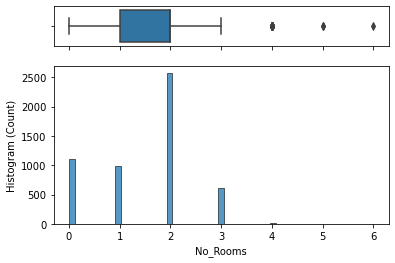

In [221]:
vis_univar(df, 'No_Rooms')

Pada plot tersebut, dapat kita lihat bahwa kolom `No_Rooms` terdapat outlier dimana datanya ada yang lebih dari 3, hal itu benar karena jumlah `No_Rooms` dari data tersebut ada yang `lebih dari 3`, dapat dibuktikan pada tabel berikut, dan hal ini merupakan hal yang wajar.

In [222]:
df_rooms = df[df["No_Rooms"] > 3]
df_rooms

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,CleanedPrice
544,Wesling Kedoya Apartment 4+1BR Non Furnished,4,3,Kedoya,Jakarta Barat,106.751800,-6.179500,0,264.0,Tower -,10,IDR,170000000,170000000
743,Casablanca Apartment 5BR Fully Furnished,5,4,Casablanca,Jakarta Selatan,106.845273,-6.222923,1,644.0,Tower -,24,IDR,702000000,702000000
793,Kemang Village Apartment 4+1BR Tower Cosmopolitan,4,4,Kemang,Jakarta Selatan,106.811453,-6.259374,1,240.0,Tower Cosmopolitan,22,IDR,456000000,456000000
1055,Kemang Village Apartment 4BR View City (Selatan),4,3,Kemang,Jakarta Selatan,106.811453,-6.259374,0,249.0,Tower Bloomington,19,USD,44400,666000000
1191,Ancol Mansion Apartment 4BR Semi Furnished,4,5,Ancol,Jakarta Utara,106.845853,-6.122102,0,160.0,Tower -,23,IDR,230000000,230000000
1550,Parama Apartment 4BR Non Furnished,4,2,TB Simatupang,Jakarta Selatan,106.787400,-6.291400,0,260.0,Tower -,3,IDR,260000000,260000000
1865,La Maison Barito Apartment 5+1BR View City,5,4,Kebayoran Baru,Jakarta Selatan,106.794400,-6.246300,1,296.0,Tower Apartement,16,IDR,763600000,763600000
2030,ST Moritz Apartment 4BR Fully Furnished,4,3,Puri Indah,Jakarta Barat,106.738730,-6.190723,1,259.0,Tower Ambassador,24,IDR,350000000,350000000
2411,Parama Apartment 4BR View city,4,2,TB Simatupang,Jakarta Selatan,106.787400,-6.291400,0,276.0,Tower -,3,IDR,290000000,290000000
2652,Mitra Oasis Residence 4+1BR Tower B,4,2,Senen,Jakarta Pusat,106.839511,-6.174313,1,209.0,Tower B,21,IDR,175650000,175650000


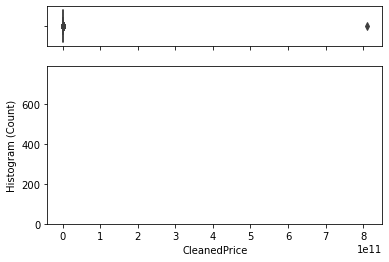

In [177]:
vis_univar(df, 'CleanedPrice')

Terdapat kejanggalan dari plot diatas, bahwa ada data yang nilai `Cleaned Price` nya dalam bentuk IDR lebih dari 800 miliyar,dapat kita buktikan pada tabel berikut :

In [223]:
df_CleanedPrice = df[df["CleanedPrice"] > 800000000000]
df_CleanedPrice

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,CleanedPrice
1163,Signature Park Grande Studio Fully Furnished,0,1,MT Haryono,Jakarta Timur,106.866201,-6.245201,1,25.0,Tower Green Signature,20,USD,54000000,810000000000


Dari analisis yang saya buat, bahwasanya data `Annual_Price` tersebut adalah harga dalam bentuk Rupiah (IDR), sehingga terdapat outlier dimana harga `Cleaned_Price` nya menjadi lebih dari 800 milyar. Maka dari itu, USD nya akan kita ubah menjadi IDR sehingga nilai CleanedPrice nya tidak jauh berbeda dengan yang lain

In [224]:
df_update = df.at[1163,'Currency'] = 'IDR'

In [225]:
df.head(1164)

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,CleanedPrice
0,Taman Sari Semanggi Apartment 1BR Tower A,1,1,Semanggi,Jakarta Selatan,106.819159,-6.226598,1,43.0,Tower A,23,IDR,96000000,96000000
1,Puri Park View Apartment 2BR Semi Furnished,2,1,Kebon Jeruk,Jakarta Barat,106.756061,-6.192081,0,35.0,Tower CB,19,IDR,30000000,30000000
2,Metro Park Residence 2BR Fully Furnished,2,1,Kedoya,Jakarta Barat,106.757651,-6.186415,1,53.0,Tower Milan,22,IDR,70000000,70000000
3,Pondok Indah Golf Apartment 2BR View Golf Area,2,2,Pondok Indah,Jakarta Selatan,106.784600,-6.272637,1,85.0,Tower -,24,IDR,576000000,576000000
4,Season City Apartment 2BR Tower C,2,1,Grogol,Jakarta Barat,106.796056,-6.153652,0,48.0,Tower C,15,IDR,32000000,32000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159,Kemang Village 2BR,2,2,Kemang,Jakarta Selatan,106.811453,-6.259374,1,120.0,Tower Infinity,13,IDR,295000000,295000000
1160,The Mansion Kemayoran Jasmine 2BR Tower Capilano,2,1,Kemayoran,Jakarta Pusat,106.854936,-6.147823,0,70.0,Tower Capilano,18,IDR,50000000,50000000
1161,Ciputra International Puri 1BR View Pool,1,1,Puri Indah,Jakarta Barat,106.730093,-6.174074,0,38.0,Tower Amsterdam,9,IDR,40000000,40000000
1162,Tifolia Apartment Studio Fully Furnished,0,1,Pulomas,Jakarta Timur,106.892794,-6.175180,1,21.0,Tower Tifolia,18,IDR,26000000,26000000


Dikarenakan nilai `CleanedPrice` nya tidak berubah, maka kita akan melakukan perulangan pada soal no 1, untuk itu terlebih dahulu kita akan menghapus column `CleanedPrice`nya

In [226]:
df = df.drop(columns = "CleanedPrice")
df.head()

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price
0,Taman Sari Semanggi Apartment 1BR Tower A,1,1,Semanggi,Jakarta Selatan,106.819159,-6.226598,1,43.0,Tower A,23,IDR,96000000
1,Puri Park View Apartment 2BR Semi Furnished,2,1,Kebon Jeruk,Jakarta Barat,106.756061,-6.192081,0,35.0,Tower CB,19,IDR,30000000
2,Metro Park Residence 2BR Fully Furnished,2,1,Kedoya,Jakarta Barat,106.757651,-6.186415,1,53.0,Tower Milan,22,IDR,70000000
3,Pondok Indah Golf Apartment 2BR View Golf Area,2,2,Pondok Indah,Jakarta Selatan,106.784600,-6.272637,1,85.0,Tower -,24,IDR,576000000
4,Season City Apartment 2BR Tower C,2,1,Grogol,Jakarta Barat,106.796056,-6.153652,0,48.0,Tower C,15,IDR,32000000


In [227]:
# Create a new function
def new_class(Currency, Annual_Price):
    if Currency == 'USD' :
        return Annual_Price*15000
    elif Currency == 'IDR' :
        return Annual_Price

# Create new column "CleanedPrice"
df['CleanedPrice'] = np.vectorize(new_class)(df['Currency'],df['Annual_Price'])
df.head(1164)

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,CleanedPrice
0,Taman Sari Semanggi Apartment 1BR Tower A,1,1,Semanggi,Jakarta Selatan,106.819159,-6.226598,1,43.0,Tower A,23,IDR,96000000,96000000
1,Puri Park View Apartment 2BR Semi Furnished,2,1,Kebon Jeruk,Jakarta Barat,106.756061,-6.192081,0,35.0,Tower CB,19,IDR,30000000,30000000
2,Metro Park Residence 2BR Fully Furnished,2,1,Kedoya,Jakarta Barat,106.757651,-6.186415,1,53.0,Tower Milan,22,IDR,70000000,70000000
3,Pondok Indah Golf Apartment 2BR View Golf Area,2,2,Pondok Indah,Jakarta Selatan,106.784600,-6.272637,1,85.0,Tower -,24,IDR,576000000,576000000
4,Season City Apartment 2BR Tower C,2,1,Grogol,Jakarta Barat,106.796056,-6.153652,0,48.0,Tower C,15,IDR,32000000,32000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159,Kemang Village 2BR,2,2,Kemang,Jakarta Selatan,106.811453,-6.259374,1,120.0,Tower Infinity,13,IDR,295000000,295000000
1160,The Mansion Kemayoran Jasmine 2BR Tower Capilano,2,1,Kemayoran,Jakarta Pusat,106.854936,-6.147823,0,70.0,Tower Capilano,18,IDR,50000000,50000000
1161,Ciputra International Puri 1BR View Pool,1,1,Puri Indah,Jakarta Barat,106.730093,-6.174074,0,38.0,Tower Amsterdam,9,IDR,40000000,40000000
1162,Tifolia Apartment Studio Fully Furnished,0,1,Pulomas,Jakarta Timur,106.892794,-6.175180,1,21.0,Tower Tifolia,18,IDR,26000000,26000000


Pada index ke 1163 nilai `Currency` nya sudah berubah menjadi `IDR`, sehingga nilai `CleanedPrice` nya tidak lagi menjadi 800 milyar, kemudian kita akan mencek outliers nya lagi

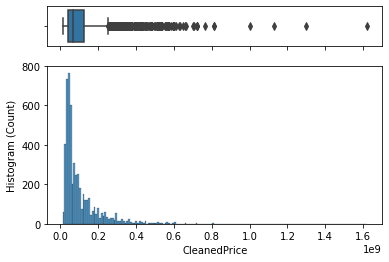

In [193]:
vis_univar(df, 'CleanedPrice')

Disini, untuk nilai outliers nya masih dikatakan normal, karena untuk harga 1.6 milyar tersebut, mempunyai fasilitas yang mewah, dapat kita lihat pada tabel berikut ini:

In [228]:
df_CleanedPrice = df[df["CleanedPrice"] > 1600000000]
df_CleanedPrice

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,CleanedPrice
3923,Pakubuwono Residence 4BR Tower CottonWood,4,4,Pakubuwono,Jakarta Selatan,106.78608,-6.236956,1,548.0,Tower CottonWood,24,USD,108000,1620000000


### 3. Apartemen di Kota/Kabupaten yang memiliki rata-rata harga paling tinggi, kemudian membuat visualisasi untuk mendukung klaim tersebut

In [229]:
df.head()

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,CleanedPrice
0,Taman Sari Semanggi Apartment 1BR Tower A,1,1,Semanggi,Jakarta Selatan,106.819159,-6.226598,1,43.0,Tower A,23,IDR,96000000,96000000
1,Puri Park View Apartment 2BR Semi Furnished,2,1,Kebon Jeruk,Jakarta Barat,106.756061,-6.192081,0,35.0,Tower CB,19,IDR,30000000,30000000
2,Metro Park Residence 2BR Fully Furnished,2,1,Kedoya,Jakarta Barat,106.757651,-6.186415,1,53.0,Tower Milan,22,IDR,70000000,70000000
3,Pondok Indah Golf Apartment 2BR View Golf Area,2,2,Pondok Indah,Jakarta Selatan,106.784600,-6.272637,1,85.0,Tower -,24,IDR,576000000,576000000
4,Season City Apartment 2BR Tower C,2,1,Grogol,Jakarta Barat,106.796056,-6.153652,0,48.0,Tower C,15,IDR,32000000,32000000


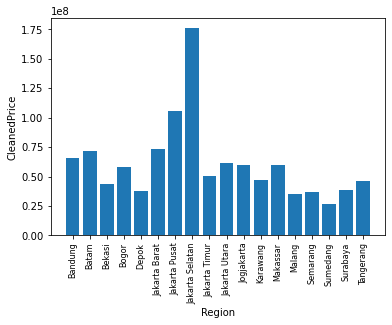

In [231]:
# Melakukan visualisasi terhadap kota/kabupaten yang memiliki harga yang paling tinggi

keys = [region for region, df in df.groupby(['Region'])]
plt.bar(keys,df.groupby(['Region']).mean()['CleanedPrice'])
plt.ylabel('CleanedPrice')
plt.xlabel('Region')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

Pada plot ini dapat kita lihat bahwa, Apartemen di Kota/Kabupaten yang memiliki rata-rata harga paling tinggi terdapat di Kota/Kabupaten `Jakarta Selatan`

### 4. Analisis kolom `Longitude` dan `Latitude`. Apakah ada kejanggalan?

In [232]:
df[['Longitude','Latitude']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5303 entries, 0 to 5302
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Longitude  5303 non-null   float64
 1   Latitude   5303 non-null   float64
dtypes: float64(2)
memory usage: 83.0 KB


In [233]:
df[['Longitude','Latitude']]

,Longitude,Latitude
0,106.819159,-6.226598
1,106.756061,-6.192081
2,106.757651,-6.186415
3,106.784600,-6.272637
4,106.796056,-6.153652
...,...,...
5298,106.993400,-6.243400
5299,106.664000,-6.294400
5300,106.829330,-6.216540
5301,106.801738,-6.202296


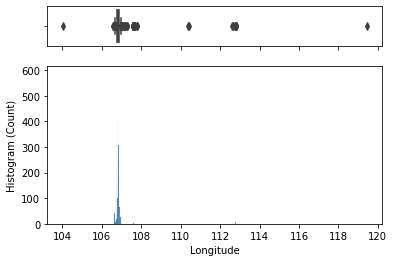

In [234]:
vis_univar(df, 'Longitude')

Pada plot diatas, untuk `Longitude` terdapat outliers, tetapi hal itu merupakan hal yang wajar karena letak Longitude nya memang berada pada koordinat tersebut.

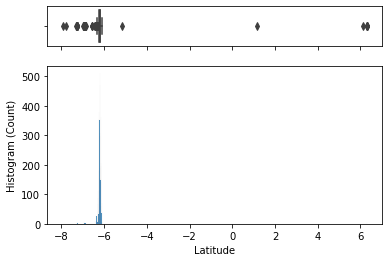

In [206]:
vis_univar(df, 'Latitude')

Pada plot diatas, untuk `Latitude` terdapat outliers, tetapi hal itu merupakan hal yang wajar karena letak Latitude nya memang berada pada koordinat tersebut.